## Rolagem e Expansão

Uma premissa importante das séries temporais é a possibilidade de criar dados com base em janelas rolantes. Para tanto, deve-se dividir os dados em janelas temporais e então calcular uma função de agregação para cada janela (média, por exemplo). Dessa forma podemos ober uma média móvel para uma série temporal. A seguir veremos como fazer esse procedimento usando Pandas.

Inicialmente, vamos plotar o valor de fechamento das ações do Starbucks (Close).

In [1]:
import pandas as pd
%matplotlib inline

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
df = pd.read_csv('starbucks.csv',  index_col="Date" , parse_dates=True)
df.head()


,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

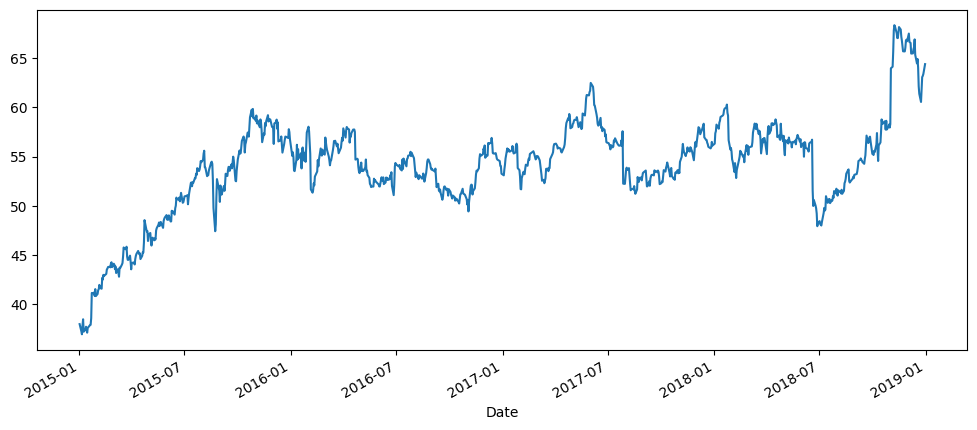

In [6]:
df["Close"].plot(figsize=(12,5))

Vamos agora definir uma janela de 7 dias e obter a média do valor das ações para cada janela.

In [9]:
df2 = df.rolling(window=7).mean()
df2.head(15)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
2015-01-09,NaN,NaN
2015-01-12,37.616786,1.238222e+07
2015-01-13,37.578786,1.297288e+07
2015-01-14,37.614786,1.264020e+07


Vamos agora comparar nossa rolagem com os dados originais fazendo um plot.

<Axes: xlabel='Date'>

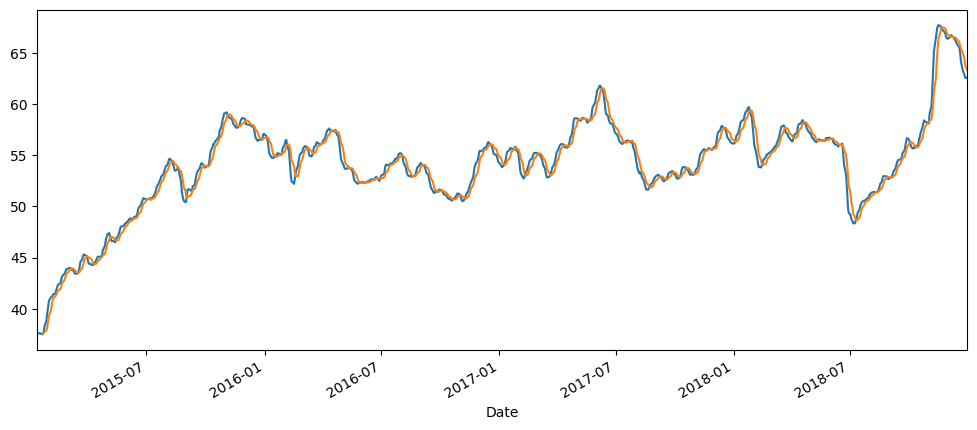

In [14]:
df["Close"].plot(figsize=(12,5)).autoscale(axis="x", tight=True)
df.rolling(window=7).mean()["Close"].plot()

Vamos agora colocar uma janela de 30 dias.

<Axes: xlabel='Date'>

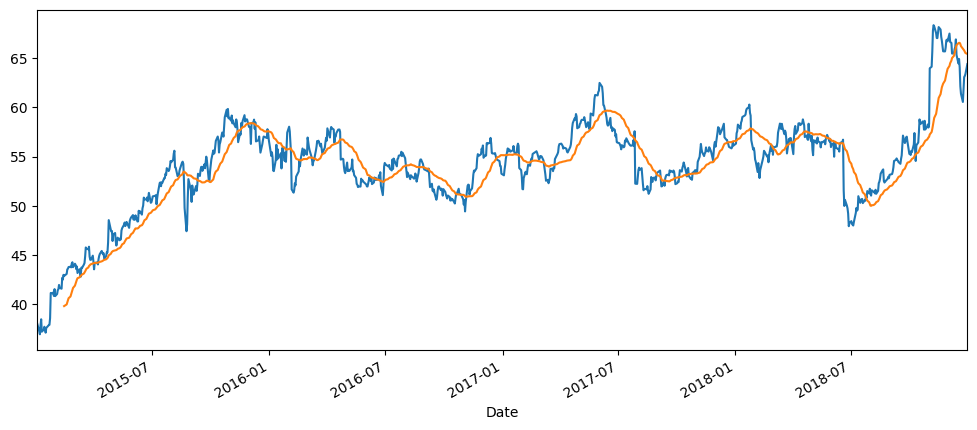

In [15]:
df["Close"].plot(figsize=(12,5)).autoscale(axis="x", tight=True)
df.rolling(window=30).mean()["Close"].plot()

Observa-se que usando um valor grande para a janela obtemos uma linha que indica a tendência do preço das ações ao longo do tempo. Já um valor pequeno faz a curva se aproximar da linha gerada pelos dados reais.

Para tornar o gráfico mais informativo é necessário acrescentar uma legenda que permita entender o significado de cada linha. Para tanto, vamos gerar um campo adicional no dataframe chamado "Close: 30 day mean".

In [20]:
df["Close: 30 day mean"] = df.rolling(window=30).mean()["Close"].plot()

DataError: Cannot aggregate non-numeric type: object

<Axes: xlabel='Date'>

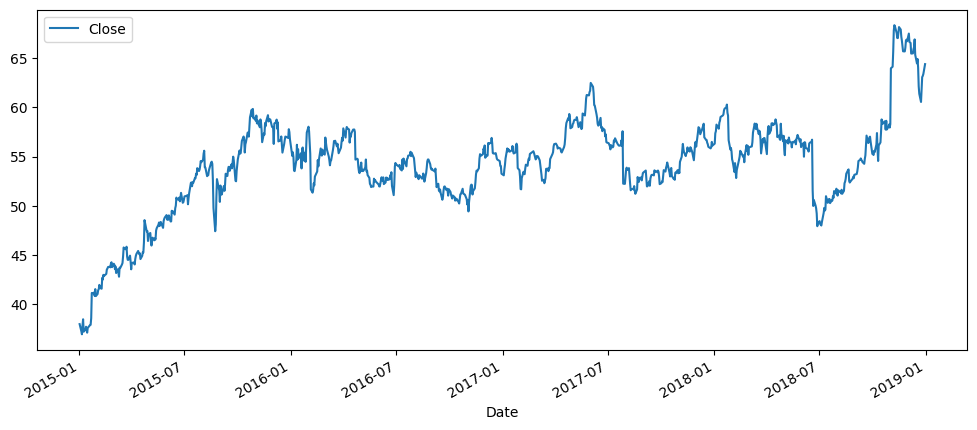

In [19]:
df[["Close" , "Close: 30 day mean"]].plot(figsize=(12,5))

### Expansão
Na expansão você usa uma única janela que vai se expandindo com o passar do tempo. Assim, espera-se obter uma curva ascendente na qual, ao final, o valor correspondente ao último elemento temporal equivale à média de todos os valores do conjunto de dados. No caso do nosso exemplo, o último valor obtido corresponde à média do valor de fechamento das ações do conjunto de dados.

<Axes: xlabel='Date'>

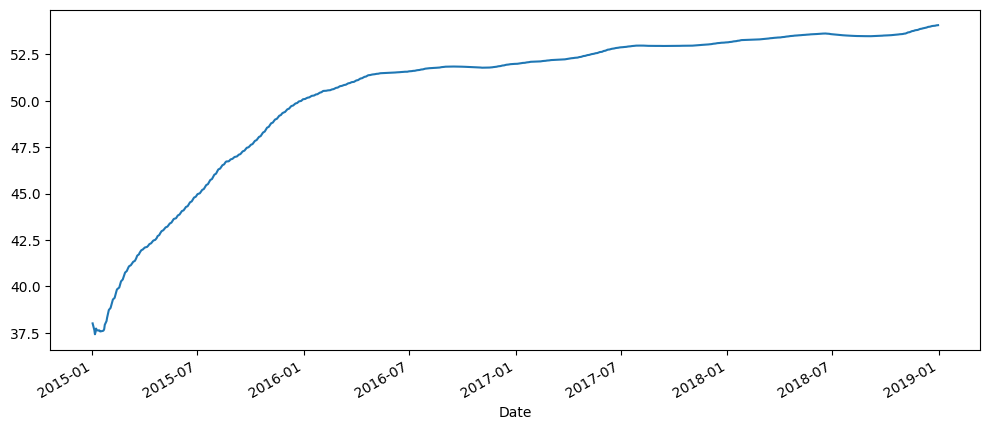

In [21]:
df["Close"].expanding().mean().plot(figsize=(12,5))